# Classifier fitting

This notebook will work on applying our previously defined neuron onto cat or dog finding.

**Main goals are**: 
 - See what are the problems remaining to implement it in concrete application


In [3]:
# !pip install h5py
import h5py 
from local_lib.dataset import *
X_train, y_train, X_test, y_test = load_data()

In [4]:
import numpy as np
np.shape(X_train)

(1000, 64, 64)

**To be able to use this data we will have to reshape it so it only contains 2 dimensions**

In [4]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train_reshaped.shape

(1000, 4096)

In [3]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test_reshaped.shape

(200, 4096)

In [4]:
X_train_reshaped_normalized = X_train_reshaped / 255

**Trying to train our neuron on it**

In [8]:
from local_lib.neuron import LinearNeuron

neuron = LinearNeuron(X_train_reshaped)

neuron.fit(X_train_reshaped, y_train)

c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:17: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:13: RuntimeWarning: divide by zero encountered in log
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:13: RuntimeWarning: invalid value encountered in multiply
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

Unable to compute exp because inputs becomes too high so it returns 1.0 and 0.0 and further we try to compute log loss by using this value in a log function.<br>
**Conclusion**: we need to adjust value before it is passed to log function, using a very small value, enough to avoid 1.0 and 0.0 values but not too high to not impact loss result

c:\Users\chapu\Epitech\DEV810_Zoidberg\repo\IllnessRecognition\bootstrap\dl\local_lib\neuron.py:18: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


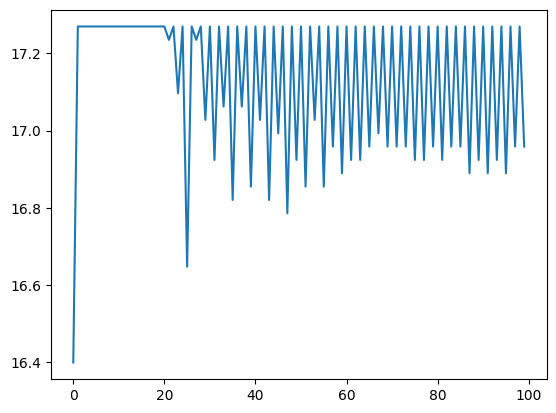

In [5]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neuron = LinearNeuron(X_train_reshaped, lr=0.5)

loss = neuron.fit(X_train_reshaped, y_train)
plt.plot(loss)
plt.show()

Now it works thanks to our adjustements but still exp error and strange loss evolution<br>
**To correct exp error we need to normalize values**

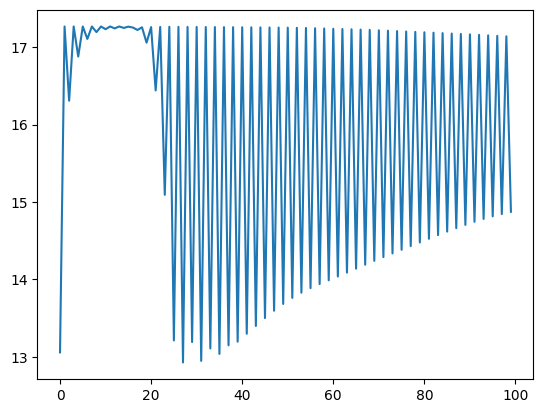

In [31]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train_reshaped_normalized = X_train_reshaped / 255

neuron = LinearNeuron(X_train_reshaped_normalized, lr=0.5)

loss = neuron.fit(X_train_reshaped_normalized, y_train)
plt.plot(loss)
plt.show()


Exponential problem solved but not loss curve
**This can be induced by huge scale gap between values (pixels)**<br>
Let's see that with a simple 2 parameters example

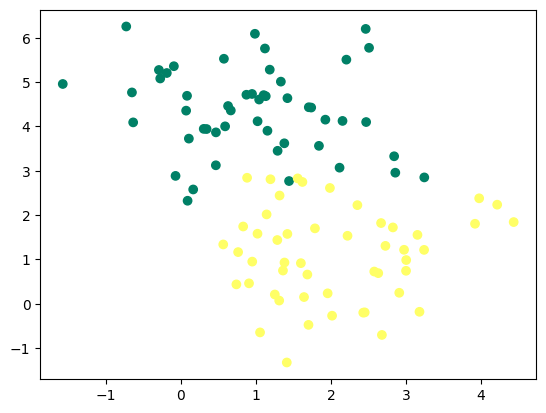

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1

y = y.reshape(y.shape[0], 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [29]:
import numpy as np 

b = 0
#Generating sample values of w1 and w2
W1 = np.linspace(-10, 10, 100)
W2 = np.linspace(-10, 10, 100)

#Creating a map combining w1 and w2 values
W11, W22 = np.meshgrid(W1, W2)
W = np.c_[W11.ravel(), W22.ravel()].T

Z = X.dot(W) + b
A = 1 / (1 + np.exp(-Z))
epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(100,100)
L.shape


(100, 100)

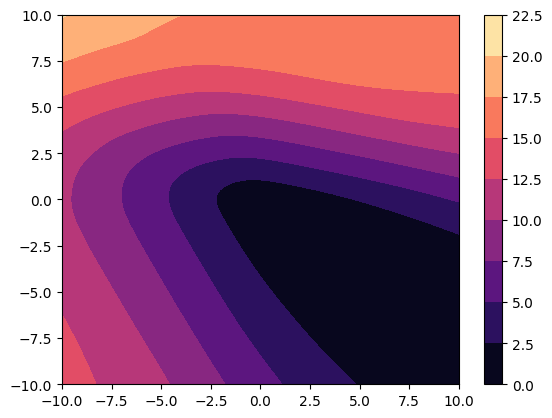

In [30]:
plt.contourf(W11, W22, L, cmap="magma")
plt.colorbar()

**We see that applying a 10 factor on x1 is completly modifying our loss evolution**

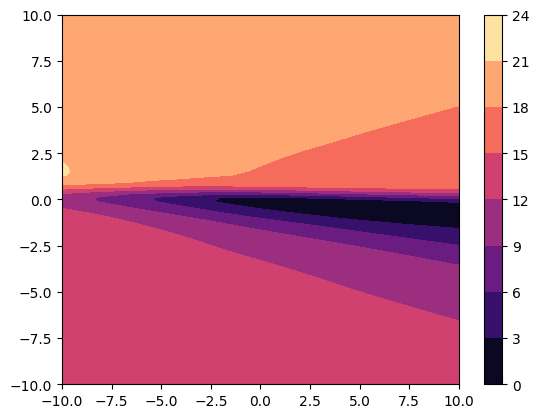

In [27]:
plt.contourf(W11, W22, L, cmap="magma")
plt.colorbar()

**Hopefully this is solved by previous normalization**

Let's try to optimize lr and n_iter

100%|██████████| 100/100 [00:00<00:00, 277.64it/s]


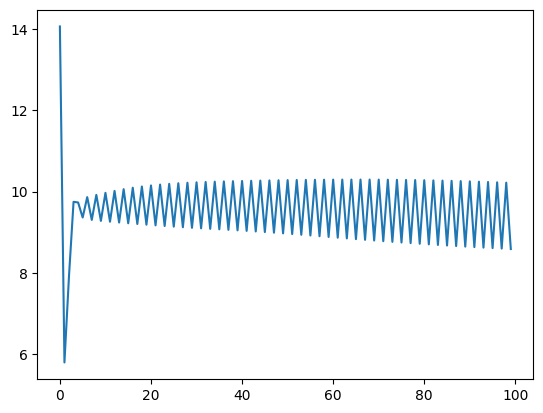

In [7]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neuron = LinearNeuron(X_train_reshaped_normalized, lr=0.1)

loss = neuron.fit(X_train_reshaped_normalized, y_train)
plt.plot(loss)
plt.show()

100%|██████████| 100/100 [00:00<00:00, 330.54it/s]


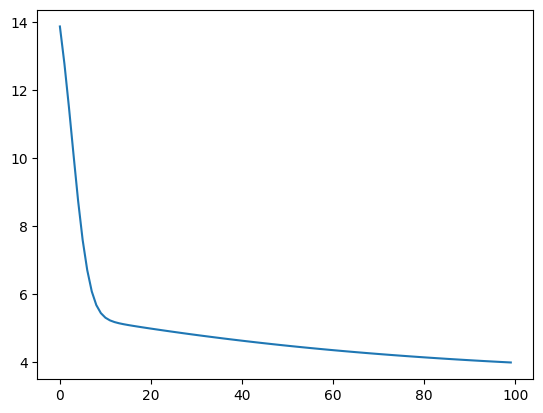

In [8]:
##Retrying fitting
from local_lib.neuron import LinearNeuron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

neuron = LinearNeuron(X_train_reshaped_normalized, lr=0.01)

loss = neuron.fit(X_train_reshaped_normalized, y_train)
plt.plot(loss)
plt.show()

**Trying with a 2 layer neural network implementation**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

dimensions de X: (2, 100)
dimensions de y: (1, 100)


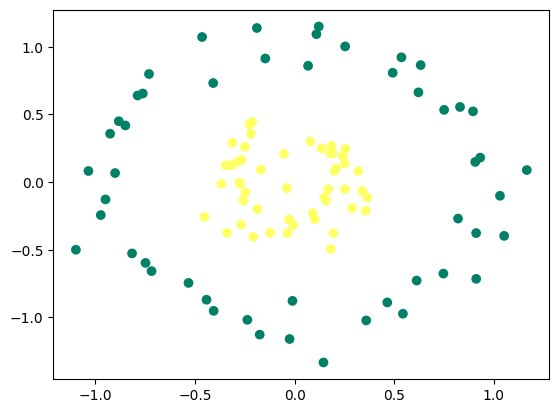

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [4]:
from local_lib.neural_network import NeuralNetwork
nn = NeuralNetwork(X, y, n1=32, n_iter=1000, lr=0.05)
hist = nn.fit(X,y)

100%|██████████| 1000/1000 [00:00<00:00, 1189.95it/s]


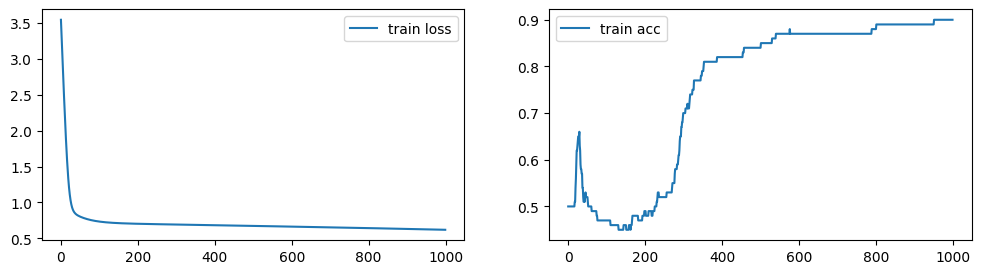

In [9]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(hist[999][1], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist[999][2], label='train acc')
plt.legend()
plt.show()

In [1]:
# !pip install h5py
import h5py 
from local_lib.dataset import *
X_train, y_train, X_test, y_test = load_data()
X_train.shape

(1000, 64, 64)

In [2]:
y_train = y_train.T 
y_test = y_test.T
X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()
X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()
m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test] 
X_train_reshape = X_train_reshape[:, :m_train] 
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|██████████| 1000/1000 [00:25<00:00, 39.22it/s]


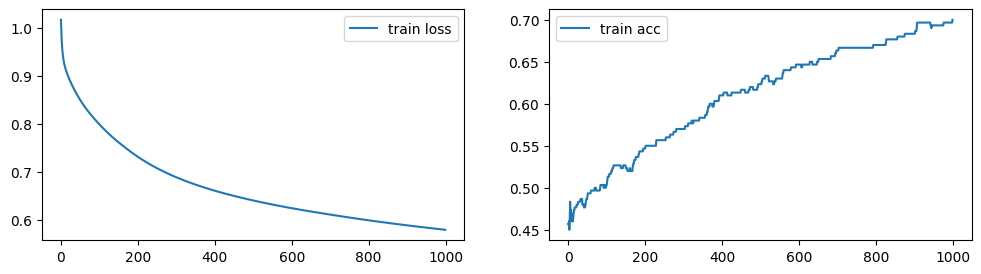

In [12]:
from local_lib.neural_network import NeuralNetwork
nn = NeuralNetwork(X_train_reshape, y_train, n1=32, n_iter=1000, lr=0.05)
hist = nn.fit(X_train_reshape,y_train)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(hist[999][1], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist[999][2], label='train acc')
plt.legend()
plt.show()

**Implementing multi layer neural network**

In [21]:
from local_lib.neural_network_multi_layer import NeuralNetworkMultiLayer

mnn = NeuralNetworkMultiLayer(X_train_reshape, y_train, dimensions=(16,16,16), n_iter=4000, lr=0.05)
hist = mnn.fit(X_train_reshape,y_train)

100%|██████████| 4000/4000 [01:17<00:00, 51.63it/s]


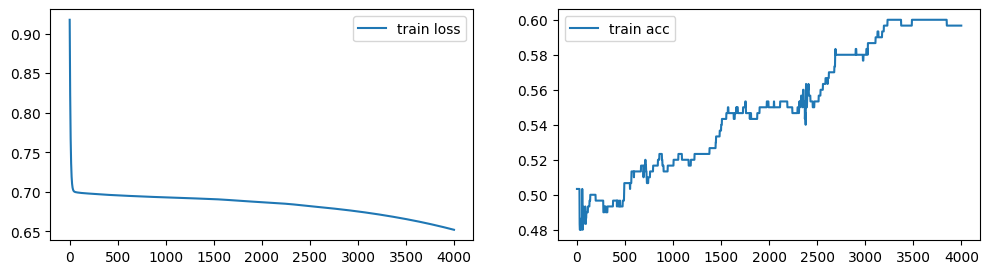

In [20]:
#(8,8,8)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist[:, 1], label='train acc')
plt.legend()
plt.show()

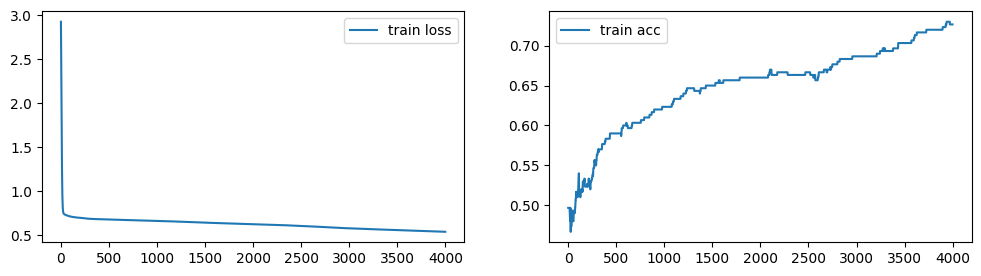

In [22]:
#(16,16,16)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(hist[:, 1], label='train acc')
plt.legend()
plt.show()

In [1]:
from local_lib.neural_network_multi_layer import NeuralNetworkMultiLayer
# !pip install h5py
import h5py 
from local_lib.dataset import *
X_train, y_train, X_test, y_test = load_data()
X_train.shape

y_train = y_train.T 
y_test = y_test.T
X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()
X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()
m_train = 300
m_test = 80
X_test_reshape = X_test_reshape[:, :m_test] 
X_train_reshape = X_train_reshape[:, :m_train] 
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

mnn = NeuralNetworkMultiLayer(X_train_reshape, y_train, dimensions=(16,16,16), n_iter=4000, lr=0.05)
hist = mnn.fit(X_train_reshape, X_test_reshape, y_train, y_test)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|██████████| 4000/4000 [01:29<00:00, 44.59it/s]


In [9]:
y_train[:, :round((len(y_train) - (len(y_train) * 0.2)))].shape

(1, 1)

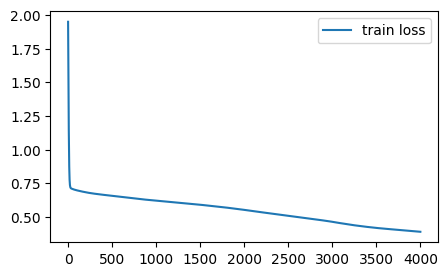

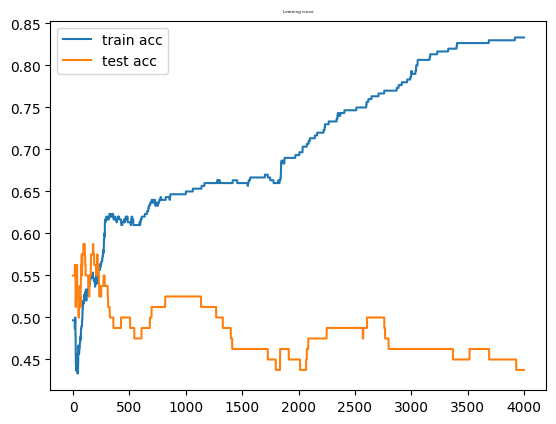

In [10]:
#(16,16,16)
plt.figure(figsize=(5, 3))
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range(0, mnn.n_iter)), hist[:, 1], label='train acc')
ax.plot(list(range(0, mnn.n_iter)), hist[:, 2], label='test acc')
ax.set_title('Learning curve', size=3)
plt.legend()
plt.show()

100%|██████████| 4000/4000 [01:27<00:00, 45.88it/s]


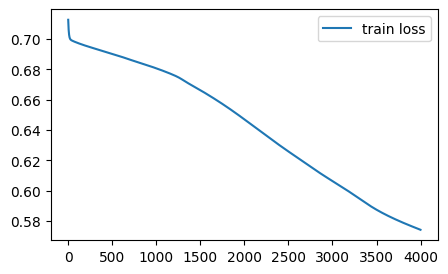

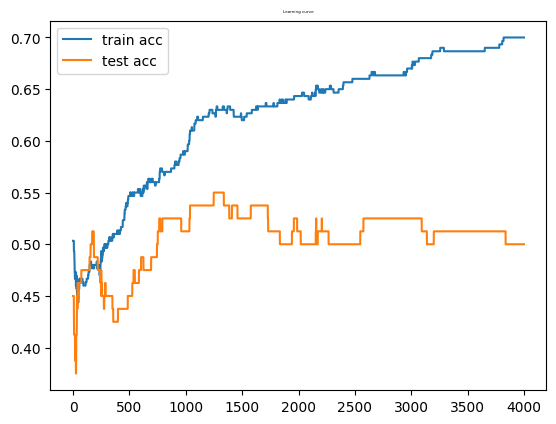

In [11]:
mnn = NeuralNetworkMultiLayer(X_train_reshape, y_train, dimensions=(8,8,8), n_iter=4000, lr=0.05)
hist = mnn.fit(X_train_reshape, X_test_reshape, y_train, y_test)
plt.figure(figsize=(5, 3))
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range(0, mnn.n_iter)), hist[:, 1], label='train acc')
ax.plot(list(range(0, mnn.n_iter)), hist[:, 2], label='test acc')
ax.set_title('Learning curve', size=3)
plt.legend()
plt.show()

100%|██████████| 4000/4000 [01:21<00:00, 49.28it/s]


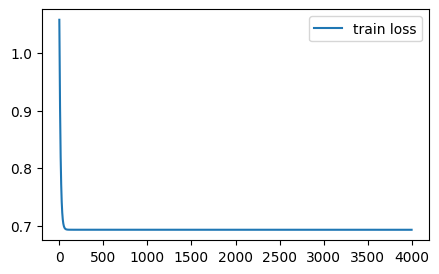

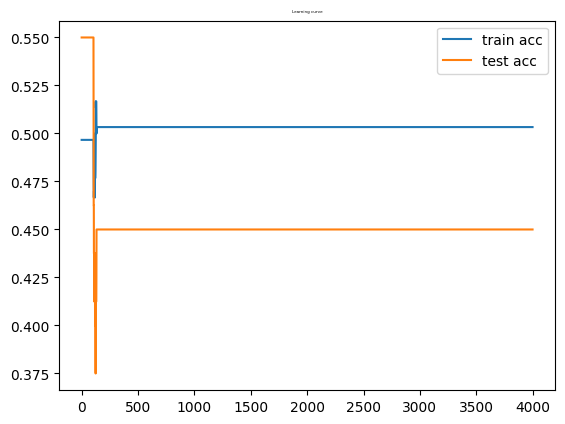

In [12]:
mnn = NeuralNetworkMultiLayer(X_train_reshape, y_train, dimensions=(4,4,4,4), n_iter=4000, lr=0.05)
hist = mnn.fit(X_train_reshape, X_test_reshape, y_train, y_test)
plt.figure(figsize=(5, 3))
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range(0, mnn.n_iter)), hist[:, 1], label='train acc')
ax.plot(list(range(0, mnn.n_iter)), hist[:, 2], label='test acc')
ax.set_title('Learning curve', size=3)
plt.legend()
plt.show()

100%|██████████| 4000/4000 [01:32<00:00, 43.28it/s]


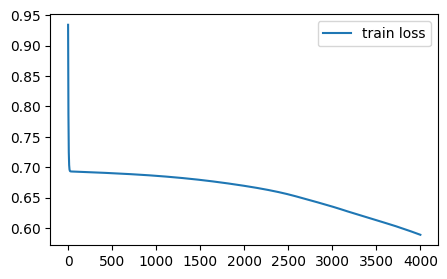

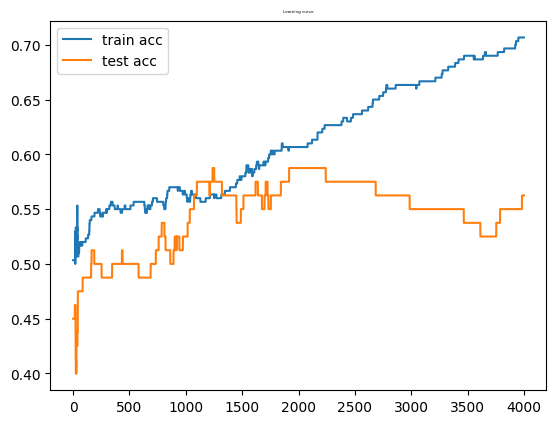

In [13]:
mnn = NeuralNetworkMultiLayer(X_train_reshape, y_train, dimensions=(8,8,8,8), n_iter=4000, lr=0.08)
hist = mnn.fit(X_train_reshape, X_test_reshape, y_train, y_test)
plt.figure(figsize=(5, 3))
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range(0, mnn.n_iter)), hist[:, 1], label='train acc')
ax.plot(list(range(0, mnn.n_iter)), hist[:, 2], label='test acc')
ax.set_title('Learning curve', size=3)
plt.legend()
plt.show()

100%|██████████| 4000/4000 [01:48<00:00, 37.02it/s]


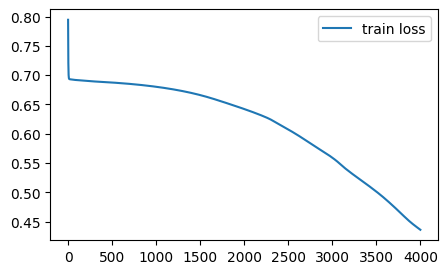

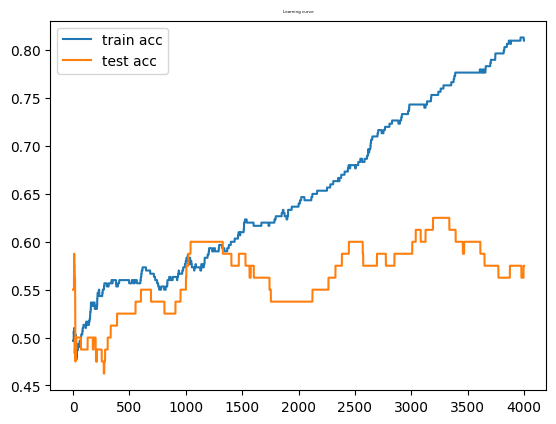

In [20]:
mnn = NeuralNetworkMultiLayer(X_train_reshape, y_train, dimensions=(16,16,16,16,16,16), n_iter=4000, lr=0.08)
hist = mnn.fit(X_train_reshape, X_test_reshape, y_train, y_test)
plt.figure(figsize=(5, 3))
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range(0, mnn.n_iter)), hist[:, 1], label='train acc')
ax.plot(list(range(0, mnn.n_iter)), hist[:, 2], label='test acc')
ax.set_title('Learning curve', size=3)
plt.legend()
plt.show()

In [ ]:
# Using a nice ploting lib
import matplotlib.pyplot as plt

import seaborn as sns

image = mnn.parameters

f, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

# Bellow we can have a closer view to what the computer will use as data

dimensions de X: (2, 100)
dimensions de y: (1, 100)


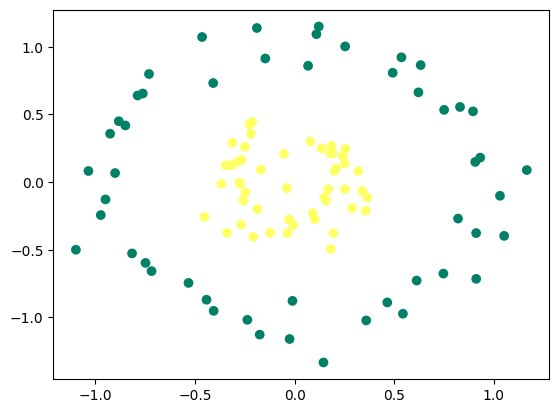

In [21]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

mnn = NeuralNetworkMultiLayer(X_train, y_train, dimensions=(16,16,16,16,16,16), n_iter=4000, lr=0.08)
hist = mnn.fit(X_train, X_test, y_train, y_test)
plt.figure(figsize=(5, 3))
plt.plot(hist[:, 0], label='train loss')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(list(range(0, mnn.n_iter)), hist[:, 1], label='train acc')
ax.plot(list(range(0, mnn.n_iter)), hist[:, 2], label='test acc')
ax.set_title('Learning curve', size=3)
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2, 1]